# Bayes4MADMAX
### Background Fitting

This notebook shows you how to remove a background from raw data. If you haven't done so yet, you'll want to get familiar with the `generate_data_demo` notebook first!

Let us again load the `Bayes4MADMAX` package first:

In [1]:
push!(LOAD_PATH, normpath(@__DIR__, "..", "src"))
using Bayes4MADMAX

Now, let's read a dataset that was saved via the `save_data()` function:

In [2]:
dataset = "simulated/tests"
fname = "test"

ex = read_struct(Experiment, fname, dataset)
signal = read_struct(Theory, fname, dataset)
data = read_data(fname, dataset, "raw_data")

Reading from /home/th347/diehl/Documents/2103-Bayes/data/simulated/tests/raw_data


,axion,background,freq,noise,pow
,Float64,Float64,Float64,Float64,Float64
1,0.0,2.20701e-21,4.0e6,9.64695e-24,2.21665e-21
2,0.0,2.25944e-21,4.002e6,6.09605e-24,2.26554e-21
3,0.0,2.31175e-21,4.004e6,1.27068e-23,2.32446e-21
4,0.0,2.36393e-21,4.006e6,-1.61182e-23,2.34781e-21
5,0.0,2.41598e-21,4.008e6,4.02808e-24,2.42001e-21
6,0.0,2.46789e-21,4.01e6,1.08526e-23,2.47875e-21
7,0.0,2.51968e-21,4.012e6,-9.42345e-24,2.51025e-21
8,0.0,2.57132e-21,4.014e6,1.30115e-23,2.58434e-21
9,0.0,2.62284e-21,4.016e6,9.87047e-27,2.62285e-21


The HDF5 file format is maybe not familiar to some. Below you can find basic functions how to access file contents. Find more in the HDF5.jl documentation.

In [3]:
# This is how a dataset looks in HDF5 format:
using HDF5
PATH="./data/simulated/tests/raw_data/"
fid = h5open(normpath(@__DIR__, "..", "data", dataset, "raw_data", fname*".h5"))

🗂️ HDF5.File: (read-only) /home/th347/diehl/Documents/2103-Bayes/data/simulated/tests/raw_data/test.h5
├─ 📂 metadata
│  ├─ 📂 Experiment
│  │  ├─ 🔢 A
│  │  ├─ 🔢 Be
│  │  ├─ 🔢 f_ref
│  │  ├─ 🔢 t_int
│  │  ├─ 🔢 Δω
│  │  └─ 🔢 β
│  └─ 📂 Theory
│     ├─ 🔢 EoverN
│     ├─ 🔢 ma
│     ├─ 🔢 rhoa
│     ├─ 🔢 vlab
│     └─ 🔢 σ_v
└─ 📂 powerspectrum
   ├─ 🔢 axion
   ├─ 🔢 background
   ├─ 🔢 freq
   ├─ 🔢 noise
   └─ 🔢 pow

In [4]:
println(read(fid["metadata"]["Theory"]))
close(fid)

Dict{String, Any}("EoverN" => 0.6, "vlab" => 242.1, "rhoa" => 0.3, "ma" => 45.513, "σ_v" => 218.0)


This is how the data looks before background subtraction:

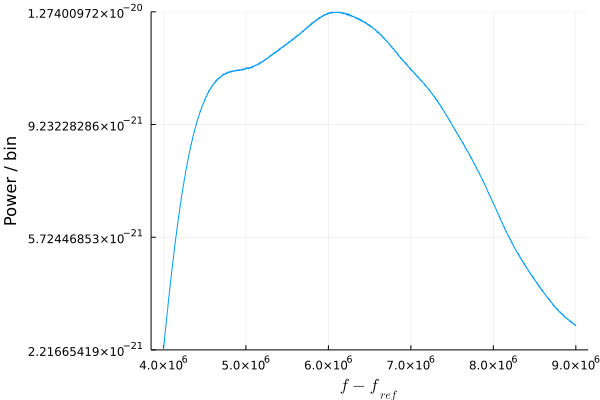

In [5]:
plot_data(data)

Now subtract the background. Currently implemented: `sg_fit()` and `id_fit()`.

This will create a new DataFrame column called `pownoB`. Yes, for `id_fit()` this will be exactly the same as `pow-background` or `noise+axion`

In [6]:
BGfit_dict = Dict(
    "type" => "SG",
    "width" => 221,
    "order" => 4
)

data = sg_fit(data, BGfit_dict["order"], BGfit_dict["width"]; cut=true)
#data = id_fit(data)

,axion,background,freq,noise,pow,pownoB
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,6.95899e-21,4.218e6,-1.14404e-23,6.94755e-21,-1.05269e-23
2,0.0,6.99237e-21,4.22e6,-6.83966e-24,6.98553e-21,-5.95432e-24
3,0.0,7.02556e-21,4.222e6,-7.52082e-24,7.01804e-21,-6.51788e-24
4,0.0,7.05855e-21,4.224e6,5.06516e-24,7.06362e-21,5.81762e-24
5,0.0,7.09135e-21,4.226e6,-8.46383e-24,7.08289e-21,-7.67372e-24
6,0.0,7.12396e-21,4.228e6,9.53452e-24,7.13349e-21,1.02807e-23
7,0.0,7.15638e-21,4.23e6,1.28637e-23,7.16924e-21,1.37496e-23
8,0.0,7.1886e-21,4.232e6,-6.92975e-24,7.18167e-21,-6.06677e-24
9,0.0,7.22064e-21,4.234e6,4.21269e-24,7.22485e-21,4.89825e-24


This is how the data looks after background subtraction:

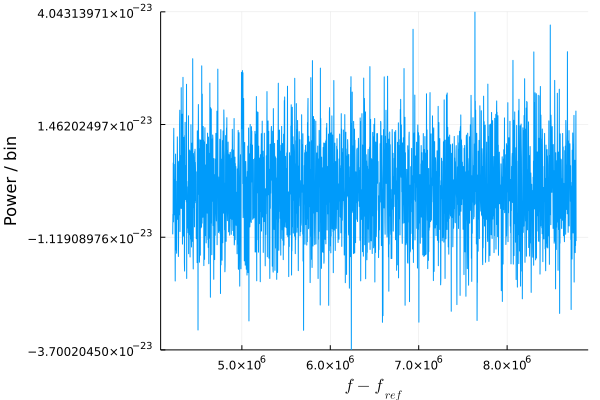

In [7]:
plot_data(data; key=:pownoB)

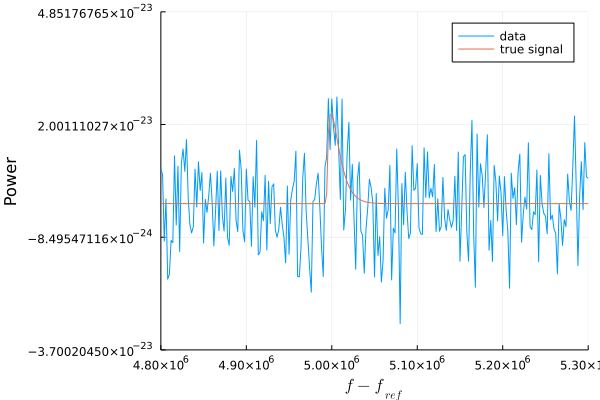

In [8]:
plot_truths(data, signal, ex; xrange=(4.8e6,5.3e6))

Save the data again. The code below will put it into a new folder "processed_data/Bg_fits_sg". Effectively the old data "test.h5" from the `generate_data_demo` notebook is contained in this file. Storing it twice seemed to me to be the cleaner alternative to overwriting and thereby potentially screwing up the raw data. Hence the clear separation.

In [9]:
save_data(data, ex, signal, "test", dataset; overwrite=true, newfolder="Bg_fits_sg", BGfit_dict=BGfit_dict)

Writing to /home/th347/diehl/Documents/2103-Bayes/data/simulated/tests/processed_data/Bg_fits_sg/test.h5
